In [3]:
#Ванина Дейкстра

import heapq
import numpy as np

def dijkstra_grid_delays(width, height, delays, start):
    n = width * height
    dist = np.full(n, np.inf)
    parent = np.full(n, -1, dtype=int)
    visited = np.zeros(n, dtype=bool)
    
    def idx(i, j):
        return i * width + j

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    si, sj = start
    start_index = idx(si, sj)
    dist[start_index] = 0
    hq = [(0, start_index)]

    while hq:
        d, v = heapq.heappop(hq)
        if visited[v]:
            continue
        visited[v] = True
        i, j = divmod(v, width)
        for dir_idx, (di, dj) in enumerate(directions):
            ni, nj = i + di, j + dj
            if 0 <= ni < height and 0 <= nj < width:
                nv = idx(ni, nj)
                w = delays[i, j, dir_idx]
                if w == 0:
                    continue
                if dist[v] + w < dist[nv]:
                    dist[nv] = dist[v] + w
                    parent[nv] = v
                    heapq.heappush(hq, (dist[nv], nv))
    return dist, parent


In [17]:
from random import randint

N = 30

delays = np.random.randint(100, 2000, (N, N, 4))  # случайные задержки
dist = dijkstra_grid_delays(N, N, delays, (0, 0))[0]
print(dist)

[    0.   792.  2419.  4221.  4918.  5252.  6716.  7810.  8441.  9502.
 10916. 11500. 11741. 12873. 13417. 12874. 13263. 13632. 14393. 15142.
 16203. 16422. 17588. 17953. 18246. 18447. 19831. 20875. 22830. 23077.
   747.  1337.  2496.  4335.  5455.  6413.  6860.  8183.  8329.  8733.
  9462. 10201. 11205. 12216. 12271. 12628. 12755. 13192. 14320. 14656.
 15530. 15916. 16242. 17139. 18454. 19268. 20781. 21641. 22785. 23807.
  1394.  1715.  2261.  4253.  5128.  6233.  6448.  8304.  8443.  9789.
 10145. 10467. 10835. 10988. 11776. 12396. 13193. 13393. 15093. 15448.
 16172. 17294. 17779. 17732. 18581. 19526. 20834. 22539. 22959. 23256.
  3373.  3127.  3208.  3950.  5175.  5592.  6557.  7224.  8967.  9718.
 10026. 10778. 11242. 11520. 11941. 12069. 12384. 13493. 13720. 15317.
 15789. 17142. 18272. 18743. 19544. 20272. 20416. 22317. 22623. 24033.
  4403.  3758.  4177.  4635.  6399.  7546.  7000.  7758.  7925.  9822.
 10049. 11032. 12155. 13421. 13199. 12793. 13372. 14572. 14500. 14787.
 15517

In [78]:
N = 100
n = 100
iterations = 15

system = []     #подграф, по которому мы смотрим пути
for i in range (n):
    system += [(randint(1, N-1), randint(1, N-1))]

initial_len = []
for i in range (n):
    initial_len += [dijkstra_grid_delays(N, N, delays, system[i])]




IndexError: index 62 is out of bounds for axis 0 with size 32

In [80]:
N = 32
n = 100
iterations = 10

width = N
height = N

# Создаём массив delays (height, width, 4)
delays = np.zeros((height, width, 4))

# Проходим по всем клеткам и задаём симметричные веса
for i in range(height):
    for j in range(width):
        # Для каждого направления генерируем случайный вес
        for dir_idx, (di, dj) in enumerate([(-1, 0), (1, 0), (0, -1), (0, 1)]):
            ni, nj = i + di, j + dj
            if 0 <= ni < height and 0 <= nj < width:
                # Если вес ещё не задан, задаём случайный и зеркально в обратную сторону
                if delays[i, j, dir_idx] == 0:
                    weight = np.random.uniform(100, 2000)  # случайный вес от 0.1 до 1.0
                    delays[i, j, dir_idx] = weight
                    # Находим противоположное направление
                    opposite_dir = None
                    if dir_idx == 0: opposite_dir = 1  # ↑ ↔ ↓
                    elif dir_idx == 1: opposite_dir = 0
                    elif dir_idx == 2: opposite_dir = 3  # ← ↔ →
                    elif dir_idx == 3: opposite_dir = 2
                    # Устанавливаем такой же вес в обратную сторону
                    delays[ni, nj, opposite_dir] = weight

In [81]:
import random





system = []     #подграф, по которому мы смотрим пути
for i in range (n):
    system += [(randint(1, N-1), randint(1, N-1))]

initial_len = []
for i in range (n):
    initial_len += [dijkstra_grid_delays(N, N, delays, system[i])[0]]

links = np.zeros((height, width, 4, 3))           #Массив ребер. ребро = [вес, счетчик удалений, флаг обхода]
for i in range (height):
    for j in range(width):
        for k in range (4):
            links[i][j][k][0] = delays[i][j][k]
for it in range (iterations):
    for i in range (height):
        for j in range(width):
            for k in range (4):
                delays[i][j][k] = links[i][j][k][0]
                links[i][j][k][2] = 0
    verts_idx = []
    for i in range (height*width):
        verts_idx += [i]

    random.seed(50+3*it)
    while verts_idx:
        
        idx = random.choice(verts_idx)
        i = idx//width
        j = idx%width
            # Для каждого направления генерируем случайный вес
        for dir_idx, (di, dj) in enumerate([(-1, 0), (1, 0), (0, -1), (0, 1)]):
                ni, nj = i + di, j + dj
                if 0 <= ni < height and 0 <= nj < width:
                    # Если вес ещё не задан, задаём случайный и зеркально в обратную сторону
                    if links[i, j, dir_idx, 2] == 0:

                        delays[i, j, dir_idx] = np.inf
                        # Находим противоположное направление
                        opposite_dir = None
                        if dir_idx == 0: opposite_dir = 1  # ↑ ↔ ↓
                        elif dir_idx == 1: opposite_dir = 0
                        elif dir_idx == 2: opposite_dir = 3  # ← ↔ →
                        elif dir_idx == 3: opposite_dir = 2
                        # Устанавливаем такой же вес в обратную сторону
                        delays[ni, nj, opposite_dir] = np.inf
                        
                        len = []
                        for k in range (n):
                            len += [dijkstra_grid_delays(N, N, delays, system[k])[0]]
                        if np.array_equal(len, initial_len):
                            links[i, j, dir_idx, 1] += 1
                            links[ni,nj, opposite_dir, 1] += 1
                        else:
                            delays[i, j, dir_idx] = links[i, j, dir_idx, 0]
                            delays[ni, nj, opposite_dir] = links[ni,nj, opposite_dir, 0]
                        links[ni,nj, opposite_dir, 2] = 1
                        links[i, j, dir_idx, 2] = 1
                        #print(100*i+j)
        verts_idx.remove(idx)

KeyboardInterrupt: 

Среднее кол-во выкинутых ребер  57.0


C:\Users\1\AppData\Local\Temp\ipykernel_33376\896593298.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('binary_r')  # инвертированная grayscale карта


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

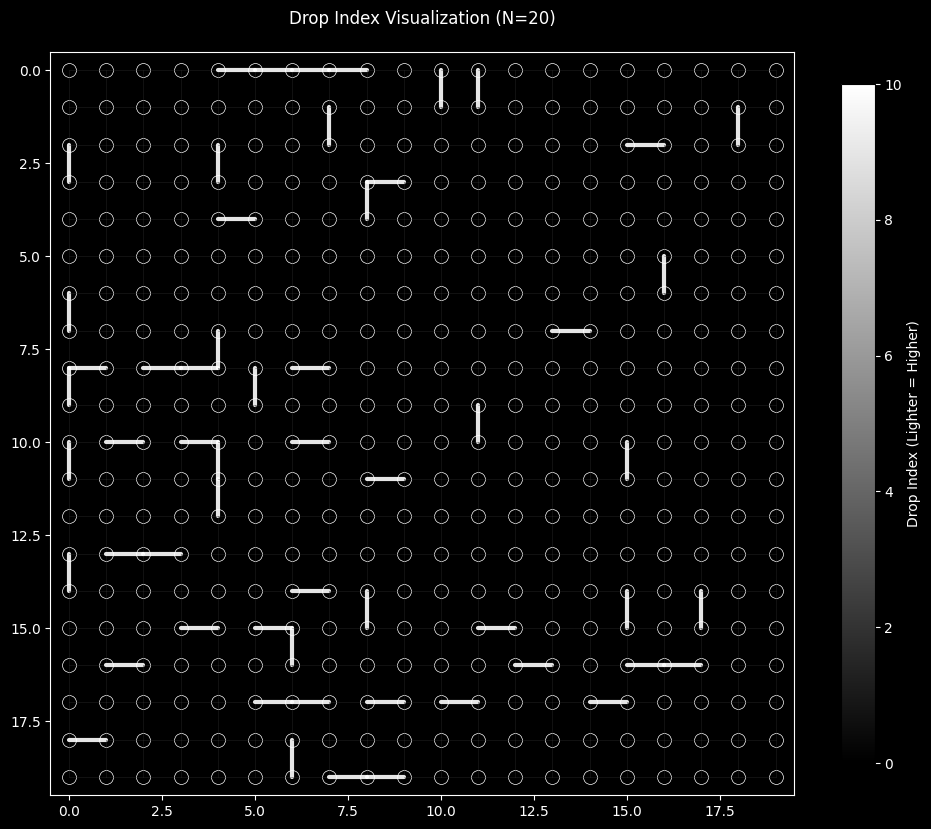

In [76]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np

def visualize_drop_index_grayscale(width, height, links):
    # Создаем фигуру с черным фоном
    fig = plt.figure(figsize=(10, 10), facecolor='black')
    ax = fig.add_subplot(facecolor='black')
    
    # Соберем все значения drop_index для нормализации
    all_drops = []
    for i in range(height):
        for j in range(width):
            for k in range(4):
                all_drops.append(links[i, j, k, 1])
    
    min_drop = min(all_drops)
    max_drop = max(all_drops)
    print('Среднее кол-во выкинутых ребер ', sum(all_drops)/iterations/2)
    
    # Создадим grayscale colormap (0-черный, 1-белый)
    cmap = cm.get_cmap('binary_r')  # инвертированная grayscale карта
    
    # Нормализуем значения
    norm = colors.Normalize(vmin=min_drop, vmax=max_drop)
    
    # Нарисуем черные вершины
    for i in range(height):
        for j in range(width):
            ax.plot(j, i, 'o', markersize=10, color='black', markeredgecolor='white', markeredgewidth=0.5)
    
    # Нарисуем все ребра
    for i in range(height):
        for j in range(width):
            # Проверяем все 4 направления
            for direction, (di, dj) in enumerate([(-1, 0), (1, 0), (0, -1), (0, 1)]):
                ni, nj = i + di, j + dj
                if 0 <= ni < height and 0 <= nj < width:
                    # Рисуем только вправо и вниз чтобы избежать дублирования
                    if direction in [1, 3]:  # вниз или вправо
                        x_vals = [j, nj]
                        y_vals = [i, ni]
                        drop_val = links[i, j, direction, 1]
                        
                        # Определяем цвет и стиль линии
                        if drop_val == 0:
                            # Ребра с drop_index = 0 - тонкие темно-серые линии
                            line_color = (0.2, 0.2, 0.2)  # очень темный серый
                            line_width = 0.5
                            alpha = 0.5
                        else:
                            # Ребра с drop_index > 0 - градации серого
                            gray_value = norm(drop_val)
                            line_color = (gray_value, gray_value, gray_value)  # оттенок серого
                            line_width = 1 + 2*(drop_val/max_drop)  # толщина зависит от значения
                            alpha = 0.9
                        
                        ax.plot(x_vals, y_vals, '-', 
                               color=line_color,
                               linewidth=line_width,
                               alpha=alpha,
                               solid_capstyle='round')
    
    # Добавим grayscale цветовую шкалу
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
    cbar.set_label('Drop Index (Lighter = Higher)', color='white')
    cbar.ax.yaxis.set_tick_params(color='white')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')
    
    # Настроим оси
    ax.set_title(f'Drop Index Visualization (N={width})', color='white', pad=20)
    ax.set_xlim(-0.5, width-0.5)
    ax.set_ylim(-0.5, height-0.5)
    ax.set_aspect('equal')
    ax.grid(False)
    ax.invert_yaxis()
    
    # Сделаем белые метки на осях
    ax.tick_params(axis='both', colors='white')
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
    print(all_drops)
    plt.tight_layout()
    plt.show()

# Визуализируем drop_index из массива links
visualize_drop_index_grayscale(width, height, links)